# Considerations for Categorical Data  
*Exploratory Data Analysis in Python*  

---

## 1. Why Perform Exploratory Data Analysis (EDA)?

- **Purposes of EDA:**
  - Detecting patterns and relationships in data.
  - Generating questions or hypotheses for further study.
  - Preparing data for machine learning and statistical modeling.

**Key point**: EDA is a crucial first step to understand your dataset before further analysis or modeling.

---

## 2. Ensuring Data is Representative

- **Representative Data:**  
  Your sample must properly reflect the **population** you wish to study.
  - *Example*: If analyzing education vs. income in the USA, collect data from US adults—not from other countries (like France).
- Using **unrepresentative data** can lead to **misleading or biased results**.

---

## 3. Understanding Categorical Classes

- **Classes (Labels):**  
  Categories or groups within a variable.
  - *Example*: In a survey on attitudes toward marriage, the "marital status" variable could have classes:
    - Single
    - Married
    - Divorced

**Why it matters:**  
Understanding the makeup and meaning of your classes is fundamental before analysis.

---

## 4. Class Imbalance

- **Class Imbalance** occurs when some classes appear much more frequently than others.
  - *Example*:  
    - Married: 50  
    - Divorced: 700  
    - Single: 250

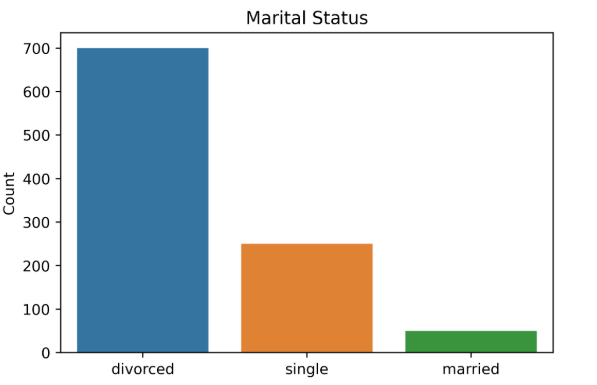

- **Why is this a problem?**
  - May not reflect the true population distribution.
  - Results (like attitudes toward marriage) could be biased by over-represented classes.

---

## 5. Calculating Class Frequency

Use `value_counts()` in pandas to count occurrences of each class.

### Code Example: Counting Class Frequency

```python
planes["Destination"].value_counts()
```

#### **Expected Output:**

```
Cochin       4391
Banglore     2773
Delhi        1219
New Delhi     888
Hyderabad     673
Kolkata       369
Name: Destination, dtype: int64
```

### **Line-by-Line Explanation:**

- `planes["Destination"]`
  - Selects the "Destination" column from the `planes` DataFrame, which contains the city each flight is going to.
- `.value_counts()`
  - Counts how many times each unique destination occurs in the dataset.

### **Significance:**

- Shows which destinations are most common.
- Useful for spotting possible class imbalance or unusual distributions in categorical data.

---

## 6. Calculating Relative Class Frequency

To see **proportions** (not just counts), use `normalize=True` in `value_counts()`.

### Code Example: Relative Class Frequency

```python
planes["Destination"].value_counts(normalize=True)
```

#### **Expected Output:**

```
Cochin       0.425773
Banglore     0.268884
Delhi        0.118200
New Delhi    0.086105
Hyderabad    0.065257
Kolkata      0.035780
Name: Destination, dtype: float64
```

### **Line-by-Line Explanation:**

- `normalize=True`
  - Returns the **relative frequency** (as a proportion of total) for each destination.
  - For example, 0.425773 means about 42.6% of flights in the dataset go to Cochin.

### **Significance:**

- Helps determine if the dataset's class proportions match the real-world/population proportions.
- In the example, only 11.8% of flights go to Delhi, but the population value is known to be 40%, indicating the data may **not be representative**.

---

## 7. Cross-tabulation: Examining Combinations of Classes

**Cross-tabulation** helps examine the frequency of combinations of two categorical variables, like flight routes.

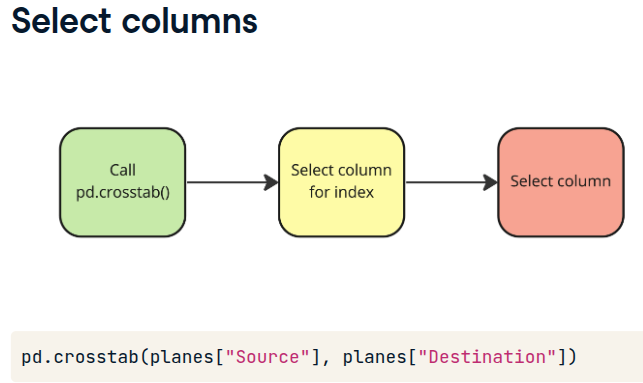

### Step 1: Create a Cross-tab with Index Only

```python
pd.crosstab(planes["Source"])
```

- **Selects only the index (here, "Source") for the table.**
- Not very useful by itself, but is a required step for more complex tables.

### Step 2: Add Columns for Cross-Tabulation

```python
pd.crosstab(planes["Source"], planes["Destination"])
```

#### **Expected Output:**

| Destination | Banglore | Cochin | Delhi | Hyderabad | Kolkata | New Delhi |
|-------------|----------|--------|-------|-----------|---------|-----------|
| **Source**  |          |        |       |           |         |           |
| Banglore    | 0        | 0      | 1199  | 0         | 0       | 868       |
| Chennai     | 0        | 0      | 0     | 0         | 364     | 0         |
| Delhi       | 0        | 4318   | 0     | 0         | 0       | 0         |
| Kolkata     | 2720     | 0      | 0     | 0         | 0       | 0         |
| Mumbai      | 0        | 0      | 0     | 662       | 0       | 0         |

### **Line-by-Line Explanation:**

- `pd.crosstab(planes["Source"], planes["Destination"])`
  - Creates a table where:
    - **Rows** = each unique "Source" (departure city)
    - **Columns** = each unique "Destination"
    - **Cells** = count of flights for that Source-Destination pair

### **Significance:**

- Shows which routes are most popular (e.g., Delhi → Cochin has 4318 flights).
- Reveals class combinations and possible class imbalances for routes.

---

## 8. Cross-Tabulation with Aggregated Values

You can use `pd.crosstab()` to calculate summary statistics (like median price) for each route, not just counts.

### Code Example: Median Price by Route

```python
pd.crosstab(
    planes["Source"],
    planes["Destination"],
    values=planes["Price"],
    aggfunc="median"
)
```

#### **Expected Output:**

| Destination | Banglore | Cochin  | Delhi  | Hyderabad | Kolkata | New Delhi |
|-------------|----------|---------|--------|-----------|---------|-----------|
| Banglore    | NaN      | NaN     | 4823.0 | NaN       | NaN     | 10976.5   |
| Chennai     | NaN      | NaN     | NaN    | NaN       | 3850.0  | NaN       |
| Delhi       | NaN      | 10262.0 | NaN    | NaN       | NaN     | NaN       |
| Kolkata     | 9345.0   | NaN     | NaN    | NaN       | NaN     | NaN       |
| Mumbai      | NaN      | NaN     | NaN    | 3342.0    | NaN     | NaN       |

### **Line-by-Line Explanation:**

- `values=planes["Price"]`
  - Instead of counting flights, fill the table with prices for each flight.
- `aggfunc="median"`
  - For each Source-Destination pair, compute the **median price**.

### **Significance:**

- Allows comparison of prices across different flight routes, not just frequency.
- Useful for identifying outlier routes or cost patterns.

---

## 9. Comparing Sample Data to Population Data

Suppose you know the **population median prices** for each route, and you want to compare them to your sample's values.

#### Example Table:

| Source    | Destination | Median Price (IDR, Population) | Median Price (Dataset) |
|-----------|-------------|-------------------------------|-----------------------|
| Banglore  | Delhi       | 4232.21                       | 4823.0                |
| Banglore  | New Delhi   | 12114.56                      | 10976.5               |
| Chennai   | Kolkata     | 3859.76                       | 3850.0                |
| Delhi     | Cochin      | 9987.63                       | 10262.0               |
| Kolkata   | Banglore    | 9654.21                       | 9345.0                |
| Mumbai    | Hyderabad   | 3431.97                       | 3342.0                |

### **Significance:**

- If sample medians differ greatly from population medians, the sample **may not be representative**.
- In the example, some sample prices are higher (Banglore–Delhi, Banglore–New Delhi), indicating possible bias or sampling issues.

---

## 10. Summary & Practice

- **Review:**
  - EDA helps you understand class frequencies and imbalances.
  - Always check if your **sample is representative** of the population.
  - Use `value_counts()` for simple class frequency and `pd.crosstab()` for combinations or aggregated stats.
  - Compare your sample's statistics to known population values when possible.

- **Next steps:**  
  Practice analyzing class frequencies and representativeness in your own datasets!

---

## **Quick Reference Table**

| Task                      | Code Example                                                      | Description                                |
|---------------------------|-------------------------------------------------------------------|--------------------------------------------|
| Count class frequencies   | `df["col"].value_counts()`                                        | Raw counts for each class                  |
| Relative frequencies      | `df["col"].value_counts(normalize=True)`                          | Proportion of total for each class         |
| Cross-tabulation (counts) | `pd.crosstab(df["col1"], df["col2"])`                             | Table of counts for combinations           |
| Cross-tab (aggregated)    | `pd.crosstab(df["col1"], df["col2"], values=df["num"], aggfunc="median")` | Table of summary stats for combinations    |

---


### Exercise
Checking for class imbalance
The 2022 Kaggle Survey captures information about data scientists' backgrounds, preferred technologies, and techniques. It is seen as an accurate view of what is happening in data science based on the volume and profile of responders.

Having looked at the job titles and categorized to align with our salaries DataFrame, you can see the following proportion of job categories in the Kaggle survey:

Job Category	     Relative Frequency
Data Science	     0.281236
Data Analytics	     0.224231
Other	             0.214609
Managerial	         0.121300
Machine Learning	 0.083248
Data Engineering	 0.075375

Thinking of the Kaggle survey results as the population, your task is to find out whether the salaries DataFrame is representative by comparing the relative frequency of job categories.

Instructions

Print the relative frequency of the "Job_Category" column from salaries DataFrame.
```python
# Print the relative frequency of Job_Category
print(salaries['Job_Category'].value_counts(normalize=True))

<script.py> output:
    Job_Category
    Data Science        0.278
    Data Engineering    0.273
    Data Analytics      0.226
    Machine Learning    0.120
    Other               0.069
    Managerial          0.034
    Name: proportion, dtype: float64
```

### Exercise
Cross-tabulation
Cross-tabulation can help identify how observations occur in combination.

Using the salaries dataset, which has been imported as a pandas DataFrame, you'll perform cross-tabulation on multiple variables, including the use of aggregation, to see the relationship between "Company_Size" and other variables.

pandas has been imported for you as pd.

Instructions 1/3

Perform cross-tabulation, setting "Company_Size" as the index, and the columns to classes in "Experience".
```python
# Cross-tabulate Company_Size and Experience
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))

<script.py> output:
    Experience    EN  EX  MI   SE
    Company_Size                 
    L             24   7  49   44
    M             25   9  58  136
    S             18   1  21   15
```
Cross-tabulate "Job_Category" and classes of "Company_Size" as column names.
```python
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"]))

<script.py> output:
    Company_Size       L   M   S
    Job_Category                
    Data Analytics    23  61   8
    Data Engineering  28  72  11
    Data Science      38  59  16
    Machine Learning  17  19  13
    Managerial         5   8   1
    Other             13   9   6
```
Update pd.crosstab() to return the mean "Salary_USD" values.
```python
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],
            values=salaries["Salary_USD"], aggfunc="mean"))

<script.py> output:
    Company_Size               L           M          S
    Job_Category                                       
    Data Analytics    112851.749   95912.685  53741.877
    Data Engineering  118939.035  121287.061  86927.136
    Data Science       96489.520  116044.456  62241.749
    Machine Learning  140779.492  100794.237  78812.586
    Managerial        190551.449  150713.628  31484.700
    Other              92873.911   89750.579  69871.248
```

# Generating New Features  
*Exploratory Data Analysis in Python*  

---

## 1. Introduction: Why Generate New Features?

- Sometimes, the **format of your data can limit your ability to detect relationships** or reduce the effectiveness of machine learning models.
- **Feature engineering** (creating new features) can:
  - Reveal hidden relationships.
  - Improve model performance.
  - Make data more interpretable.

---

## 2. Checking Correlation of Numeric Features

### Code Example: Correlation Heatmap

```python
sns.heatmap(planes.corr(numeric_only=True), annot=True)
plt.show()
```
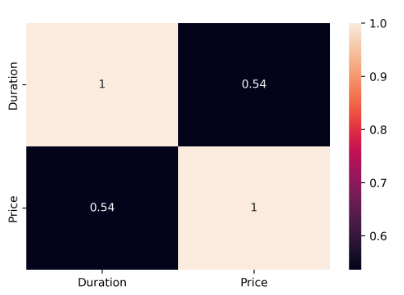

**Expected Output:**  
A heatmap matrix showing correlation coefficients between all numeric columns in `planes`.  
Example (typical output):

```
              Duration  Price
Duration        1.00    0.45
Price           0.45    1.00
```

#### Line-by-Line Explanation

- `planes.corr(numeric_only=True)`
    - Calculates pairwise correlation of all numeric columns in the DataFrame.
    - `numeric_only=True` ensures only numeric columns are included.
- `sns.heatmap(..., annot=True)`
    - Plots the correlation matrix as a heatmap.
    - `annot=True` adds the numeric correlation coefficients to each cell.
- `plt.show()`
    - Renders the plot.

**Significance:**  
- Shows the strength and direction of relationships between numeric features.
- In the example, **Price** and **Duration** have a moderate positive correlation.

---

## 3. Viewing Data Types

### Code Example

```python
print(planes.dtypes)
```
**Expected Output:**  
_(May look like this)_

```
Airline                 object
Date_of_Journey    datetime64[ns]
Source                  object
Destination             object
Route                   object
Dep_Time          datetime64[ns]
Arrival_Time      datetime64[ns]
Duration               float64
Total_Stops             object
Additional_Info         object
Price                  float64
dtype: object
```

#### Line-by-Line Explanation

- `planes.dtypes`
    - Returns the data type of each column in the DataFrame.
- `print(...)`
    - Displays the result.

**Significance:**  
- Helps confirm which columns are numeric, categorical, or datetime.
- Shows **Total_Stops** is stored as an object (string), which needs cleaning.

---

## 4. Inspecting and Cleaning the "Total_Stops" Column

### Code Example: Value Counts

```python
print(planes["Total_Stops"].value_counts())
```
**Expected Output:**

```
1 stop      4107
non-stop    2584
2 stops     1127
3 stops       29
4 stops        1
Name: Total_Stops, dtype: int64
```

#### Line-by-Line Explanation

- `planes["Total_Stops"].value_counts()`
    - Counts the number of occurrences for each unique value in the "Total_Stops" column.
- `print(...)`
    - Displays the counts.

**Significance:**  
- Shows the distribution of stop counts for flights.
- Reveals the data uses inconsistent formatting (strings like "1 stop", "2 stops", "non-stop").

---

## 5. Cleaning "Total_Stops" and Converting to Integer

### Code Example

```python
planes["Total_Stops"] = planes["Total_Stops"].str.replace(" stops", "")
planes["Total_Stops"] = planes["Total_Stops"].str.replace(" stop", "")
planes["Total_Stops"] = planes["Total_Stops"].str.replace("non-stop", "0")
planes["Total_Stops"] = planes["Total_Stops"].astype(int)
```

#### Line-by-Line Explanation

- `.str.replace(" stops", "")`
    - Removes " stops" from values like "2 stops" → "2".
- `.str.replace(" stop", "")`
    - Removes " stop" from values like "1 stop" → "1".
- `.str.replace("non-stop", "0")`
    - Replaces "non-stop" with "0" so that all entries are numeric strings.
- `.astype(int)`
    - Converts the cleaned string column to integers.

**Significance:**  
- Converts "Total_Stops" from a messy categorical string column into a clean numeric variable (integer), making it usable for analysis.

---

## 6. Rechecking Correlation After Feature Engineering

### Code Example

```python
sns.heatmap(planes.corr(numeric_only=True), annot=True)
plt.show()
```
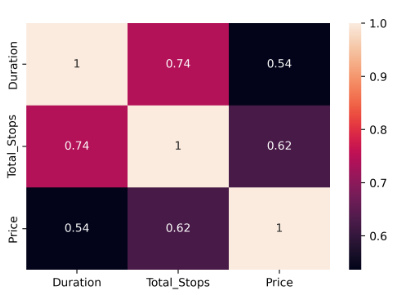

**Expected Output:**  
A new heatmap matrix including **Total_Stops**.

**Significance:**  
- **Total_Stops** is now strongly correlated with Duration, and even more correlated with Price than Duration is with Price.
- **Shows the value of cleaning and engineering features!**

---

## 7. Working with Dates: Viewing Datetime Columns

### Code Example

```python
print(planes.dtypes)
```
**Expected Output:**  
As before, but now **Total_Stops** is an integer.

```
Airline                 object
Date_of_Journey    datetime64[ns]
Source                  object
Destination             object
Route                   object
Dep_Time          datetime64[ns]
Arrival_Time      datetime64[ns]
Duration               float64
Total_Stops              int64
Additional_Info         object
Price                  float64
dtype: object
```

**Significance:**  
- Now, three columns are datetime: `Date_of_Journey`, `Dep_Time`, `Arrival_Time`.

---

## 8. Extracting Month and Weekday from Journey Dates

### Code Example

```python
planes["month"] = planes["Date_of_Journey"].dt.month
planes["weekday"] = planes["Date_of_Journey"].dt.weekday
print(planes[["month", "weekday", "Date_of_Journey"]].head())
```

**Expected Output:**

```
   month  weekday Date_of_Journey
0      9        4      2019-09-06
1     12        3      2019-12-05
2      1        3      2019-01-03
3      6        0      2019-06-24
4     12        1      2019-12-03
```

#### Line-by-Line Explanation

- `planes["Date_of_Journey"].dt.month`
    - Extracts the month (1–12) from the `Date_of_Journey` datetime column.
- `planes["Date_of_Journey"].dt.weekday`
    - Extracts the day of the week (0=Monday, 6=Sunday).
- Assigns these as new columns: `month`, `weekday`.
- `print(planes[["month", "weekday", "Date_of_Journey"]].head())`
    - Prints the first five rows of these new columns.

**Significance:**  
- Enables analysis by month or weekday (e.g., Are prices higher on weekends?).
- **Feature engineering from datetime!**

---

## 9. Extracting Departure and Arrival Hours

### Code Example

```python
planes["Dep_Hour"] = planes["Dep_Time"].dt.hour
planes["Arrival_Hour"] = planes["Arrival_Time"].dt.hour
```

#### Line-by-Line Explanation

- `.dt.hour`
    - Extracts the hour (0–23) from datetime columns.
- Assigns as new columns: `Dep_Hour`, `Arrival_Hour`.

**Significance:**  
- Allows you to analyze if certain times of day affect price or duration.
- More new numeric features for correlation and modeling.

---

## 10. Checking Correlation Again

### Code Example

```python
sns.heatmap(planes.corr(numeric_only=True), annot=True)
plt.show()
```
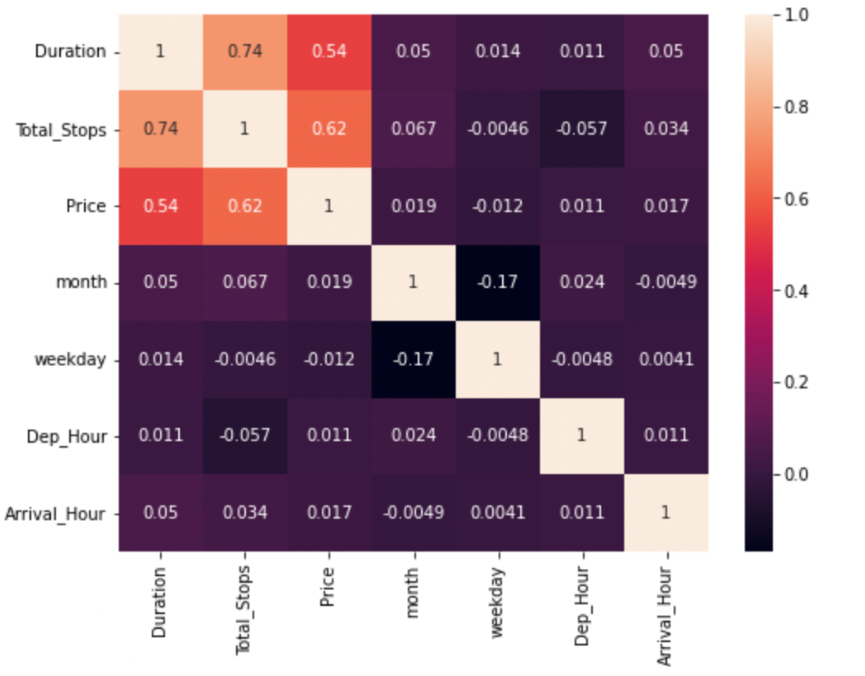

**Expected Output:**  
A heatmap matrix including all the new numeric features.

**Significance:**  
- Now you can check if `month`, `weekday`, `Dep_Hour`, `Arrival_Hour` correlate with other variables (e.g., Price).
- Even if no strong new relationships are found, **the process is valuable.**

---

## 11. Creating Categories from Numeric Data

**Task:**  
Group numeric data (like `Price`) into labeled categories (e.g., Economy, Business Class).

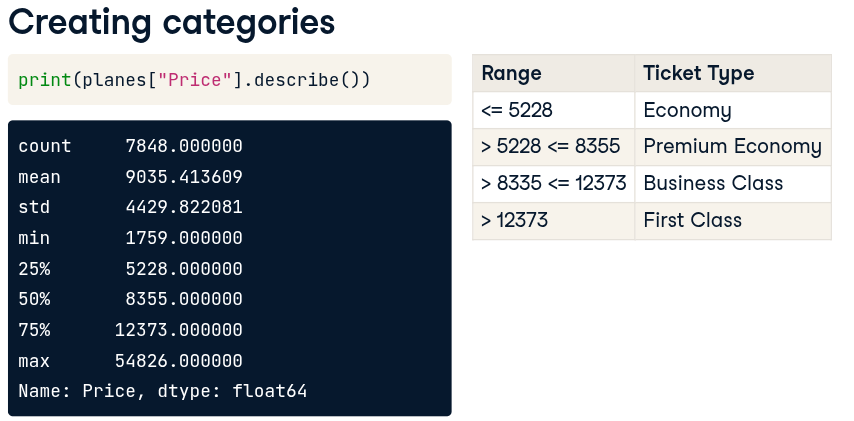

### Descriptive Statistics

```python
twenty_fifth = planes["Price"].quantile(0.25)
median = planes["Price"].median()
seventy_fifth = planes["Price"].quantile(0.75)
maximum = planes["Price"].max()
```

#### Line-by-Line Explanation

- `.quantile(0.25)`
    - Computes the 25th percentile.
- `.median()`
    - Computes the 50th percentile (median).
- `.quantile(0.75)`
    - Computes the 75th percentile.
- `.max()`
    - Returns the maximum price in the dataset.
- Assigns these values to variables for use as bin edges.

**Significance:**  
- Lets you divide the price range into quartiles for ticket category definitions.

---

## 12. Defining Labels and Bins

### Code Example

```python
labels = ["Economy", "Premium Economy", "Business Class", "First Class"]
bins = [0, twenty_fifth, median, seventy_fifth, maximum]
```

#### Line-by-Line Explanation

- `labels`
    - A list of category labels for the bins.
- `bins`
    - A list of bin edges, defining the price ranges for each category.

**Significance:**  
- Prepares for binning prices into ticket types.

---

## 13. Categorizing Price Using `pd.cut()`

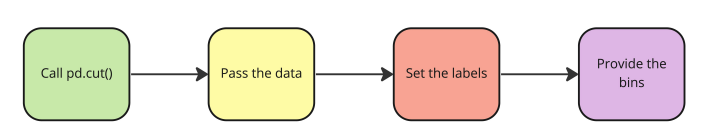

### Code Example

```python
planes["Price_Category"] = pd.cut(
    planes["Price"],
    labels=labels,
    bins=bins
)
```

#### Line-by-Line Explanation

- `pd.cut()`
    - Splits the `Price` values into bins defined by `bins`.
    - Assigns each bin a label from `labels`.
- The result is stored in a new column `Price_Category`.

**Significance:**  
- Converts continuous price data into categorical ticket types.
- Useful for further EDA or modeling.

---

## 14. Previewing Price and Price Category

### Code Example

```python
print(planes[["Price", "Price_Category"]].head())
```

**Expected Output:**

```
     Price  Price_Category
0  13882.0     First Class
1   6218.0 Premium Economy
2  13302.0     First Class
3   3873.0         Economy
4  11087.0  Business Class
```

**Significance:**  
- Shows that the binning and labeling have been applied correctly.

---

## 15. Visualizing Price Category by Airline

### Code Example

```python
sns.countplot(data=planes, x="Airline", hue="Price_Category")
plt.show()
```
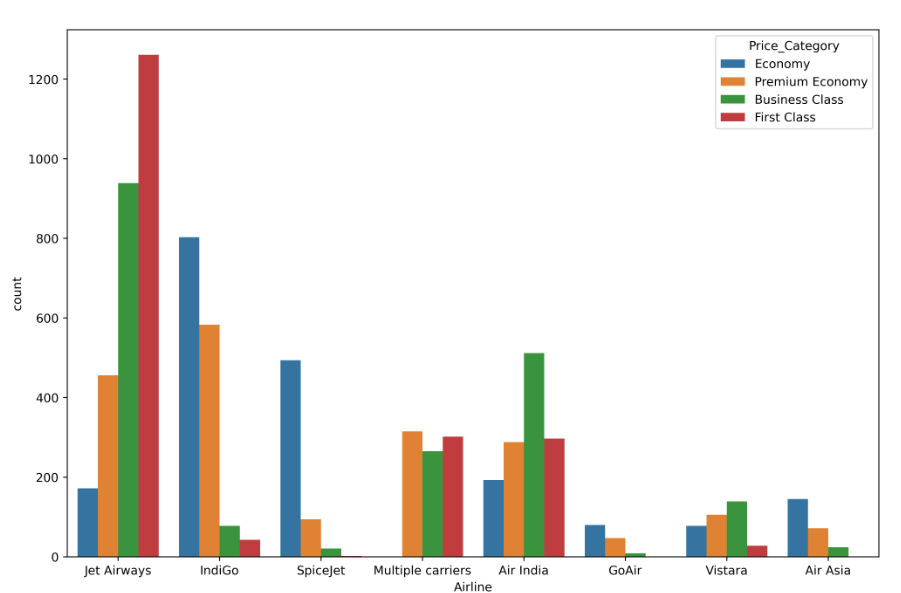

**Expected Output:**  
A grouped bar plot showing the count of flights in each price category for each airline.

**Significance:**  
- Reveals differences in ticket type distribution by airline.
    - E.g., Jet Airways has the most "First Class" flights.
    - IndiGo and SpiceJet have mostly "Economy" tickets.
- **Makes patterns in the data visible!**

---

## Summary Table: Feature Engineering Steps

| Step                       | Purpose                                                    | Code Example                               |
|----------------------------|------------------------------------------------------------|--------------------------------------------|
| Check correlations         | Find numeric relationships                                 | `sns.heatmap(planes.corr(), annot=True)`   |
| Clean and encode features  | Make categorical/numeric data usable                       | See "Total_Stops" cleaning above           |
| Extract datetime features  | Use month, weekday, hour for analysis                      | `.dt.month`, `.dt.weekday`, `.dt.hour`     |
| Create binned categories   | Turn continuous into categorical (e.g., ticket class)      | `pd.cut()`                                 |
| Visualize categories       | See patterns by group                                      | `sns.countplot(..., hue="category")`       |

---


### Exercise
Extracting features for correlation
In this exercise, you'll work with a version of the salaries dataset containing a new column called "date_of_response".

The dataset has been read in as a pandas DataFrame, with "date_of_response" as a datetime data type.

Your task is to extract datetime attributes from this column and then create a heat map to visualize the correlation coefficients between variables.

Seaborn has been imported for you as sns, pandas as pd, and matplotlib.pyplot as plt.

Instructions

Extract the month from "date_of_response", storing it as a column called "month".
Create the "weekday" column, containing the weekday that the participants completed the survey.
Plot a heat map, including the Pearson correlation coefficient scores.
```python
# Get the month of the response
salaries["month"] = salaries["date_of_response"].dt.month

# Extract the weekday of the response
salaries["weekday"] =salaries['date_of_response'].dt.weekday

# Create a heatmap
sns.heatmap(salaries.corr(numeric_only=True), annot=True)
plt.show()
```
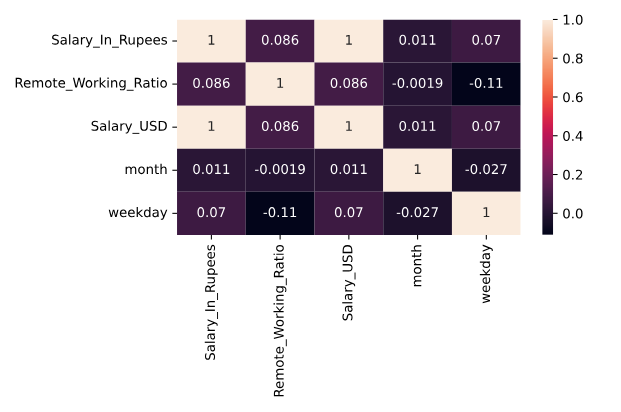

### Exercise
Calculating salary percentiles
In the video, you saw that the conversion of numeric data into categories sometimes makes it easier to identify patterns.

Your task is to convert the "Salary_USD" column into categories based on its percentiles. First, you need to find the percentiles and store them as variables.

pandas has been imported as pd and the salaries dataset read in as DataFrame called salaries.

Instructions

Find the 25th percentile of "Salary_USD".
Store the median of "Salary_USD" as salaries_median.
Get the 75th percentile of salaries.
```python
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Save the median
salaries_median = salaries["Salary_USD"].median()

# Gather the 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)

<script.py> output:
    60880.691999999995 97488.552 143225.1
```


### Exercise
Categorizing salaries
Now it's time to make a new category! You'll use the variables twenty_fifth, salaries_median, and seventy_fifth, that you created in the previous exercise, to split salaries into different labels.

The result will be a new column called "salary_level", which you'll incorporate into a visualization to analyze survey respondents' salary and at companies of different sizes.

pandas has been imported as pd, matplotlib.pyplot as plt, seaborn as sns, and the salaries dataset as a pandas DataFrame called salaries.

Instructions 1/4

Create salary_labels, a list containing "entry", "mid", "senior", and "exec".
```python
# Create salary labels
salary_labels = ['entry', 'mid', 'senior', 'exec']
```
Finish salary_ranges, adding the 25th percentile, median, 75th percentile, and largest value from "Salary_USD".
```python
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)
```
Use sns.countplot() to visualize the count of "Company_Size", factoring salary level labels.
```python
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()
```
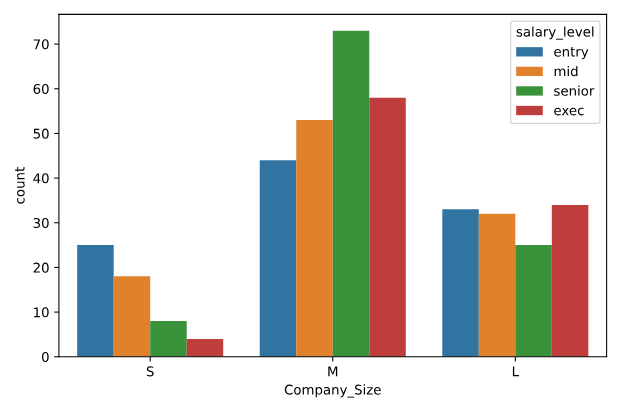


# Exploratory Data Analysis in Python: Generating Hypotheses

## 1. Introduction: Generating Hypotheses

- **Generating hypotheses** is a fundamental activity in data science.
- We use Exploratory Data Analysis (EDA) to identify possible relationships or patterns worth investigating further.
- The goal: Move from "what do we know?" to "what can we formally test?"

---

## 2. What Do We Know? (Reviewing the Planes Dataset)

- Through EDA, we understand our dataset better and can generate new features.
- Example insight:  
  - **Jet Airways' tickets** are often expensive, as many are labeled *First Class*.

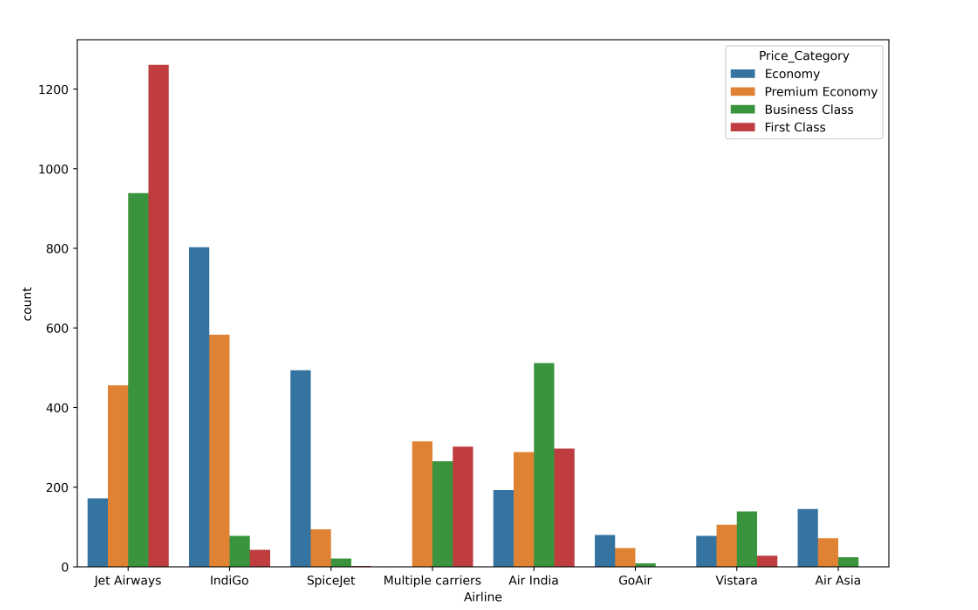

---

## 3. Examining Correlations

- Variables such as **Duration**, **Total_Stops**, and **Price** are **moderately correlated**.
- There are **no other strong relationships** in the data.

### Example: Visualizing Correlations with a Heatmap

```python
sns.heatmap(planes.corr(numeric_only=True), annot=True)
plt.show()
```
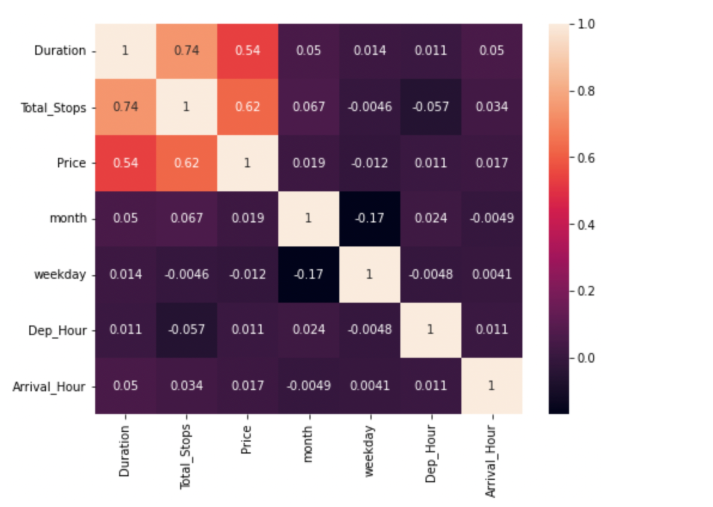

#### Output

```
[Displays a heatmap showing correlation coefficients between numerical columns in the planes dataset, with each cell annotated with its value. Stronger relationships show as darker/lighter colors.]
```

#### Line-by-Line Explanation

- `sns.heatmap(planes.corr(numeric_only=True), annot=True)`
  - **What**: Plots a heatmap of the correlation matrix for numerical columns in `planes`; each cell is annotated with the correlation value.
  - **Why**: To visually inspect how strongly pairs of numeric variables are linearly related.
  - **Expected Output**: A grid showing correlation coefficients, e.g., between `Duration`, `Price`, and `Total_Stops`, ranging from -1 (perfect negative) to 1 (perfect positive).
- `plt.show()`
  - **What**: Displays the plot.
  - **Why**: Required to render the visual in a Jupyter notebook or script.
  - **Expected Output**: The heatmap appears.

#### Significance

- Helps quickly spot which numerical variables are correlated.
- Indicates where there may be relationships worth exploring further (or not).

---

## 4. Spurious Correlation

- **Spurious correlation**: When two variables appear related due to a third variable.
- In the dataset, it looks like `Total_Stops` might correlate with `Price`, but it's actually just reflecting `Duration`.

### Example: Scatter Plot to Reveal Spurious Correlation

```python
sns.scatterplot(data=planes, x="Duration", y="Price", hue="Total_Stops")
plt.show()
```
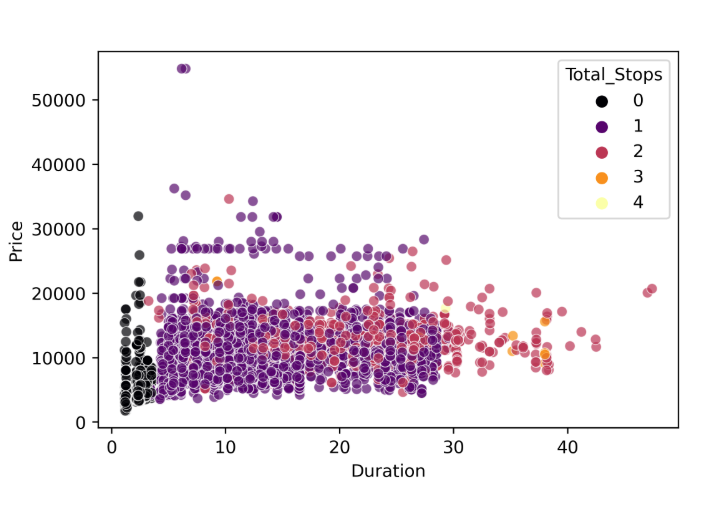

#### Output

```
[Displays a scatter plot of Duration vs Price, with points colored by Total_Stops. Points with more stops cluster at higher durations.]
```

#### Line-by-Line Explanation

- `sns.scatterplot(data=planes, x="Duration", y="Price", hue="Total_Stops")`
  - **What**: Plots a scatter plot of `Duration` (x-axis) vs `Price` (y-axis), coloring each point by the number of `Total_Stops`.
  - **Why**: To see how price and duration relate, and whether stops add information.
  - **Expected Output**: Data points cluster such that higher `Total_Stops` are mostly at higher `Duration`, revealing that the relationship between stops and price is confounded by duration.
- `plt.show()`
  - **What**: Displays the plot.
  - **Expected Output**: The scatter plot appears.

#### Significance

- Illustrates the danger of misinterpreting relationships: what looks like a correlation may be due to another variable.
- Reminds us to look deeper before jumping to conclusions.

---

## 5. Interpreting Correlations by Subgroup

- Splitting data by `Total_Stops` shows:
  - **Zero stops**: Strong negative correlation with price.
  - **Three or four stops**: No meaningful relationship with price.

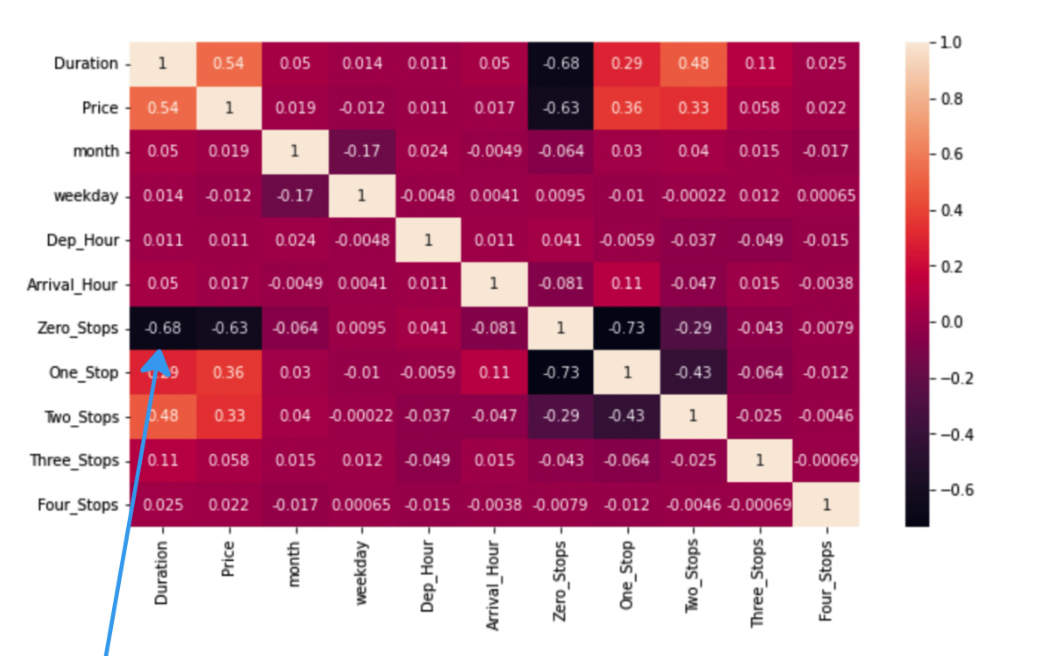

---

## 6. What Is True? (And Why Hypothesis Testing Matters)

- **Key question**: Are our observations and patterns true, or just artifacts of our current data?
- Would results hold for data from another time period?
- To make robust conclusions, we use **hypothesis testing**.

### Steps Required Before Hypothesis Testing:

1. **Formulate a Hypothesis**: State a clear, testable question.
2. **Decide the Statistical Test**: Choose the right method to assess the hypothesis.
3. **(Before collecting data!)**: These decisions must come *before* examining the data to avoid bias.

---

## 7. Data Snooping (p-hacking)

- **Data snooping/p-hacking**: 
  - Repeatedly exploring data, generating multiple hypotheses, and running many statistical tests.
  - Risks:
    - Bias from prior knowledge of the data.
    - Increased chance of "significant" (but actually spurious) results.
- **Best practice**: Avoid forming hypotheses *after* seeing the data; this can lead to misleading conclusions.

---

## 8. Generating Hypotheses with Visualizations

- **EDA** helps us spot patterns to turn into hypotheses.
- Example 1: *Do Jet Airways flights last longer than SpiceJet?*
  - Use a **bar plot** to compare mean durations by airline.

### Example: Bar Plot of Duration by Airline

```python
sns.barplot(data=planes, x="Airline", y="Duration")
plt.show()
```
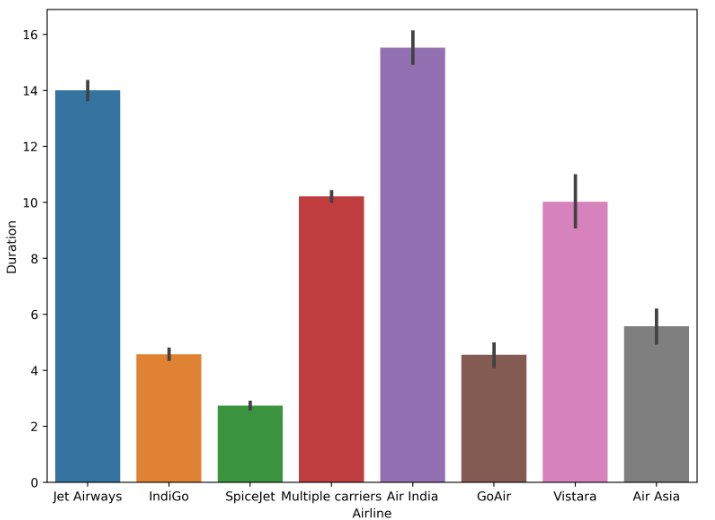

#### Output

```
[Displays a bar plot with Airlines on the x-axis and mean Duration on the y-axis. Each bar shows the average duration for each airline.]
```

#### Line-by-Line Explanation

- `sns.barplot(data=planes, x="Airline", y="Duration")`
  - **What**: Plots the mean `Duration` for each `Airline`.
  - **Why**: To see if some airlines have longer flights on average.
  - **Expected Output**: Bars of different heights; if Jet Airways has a higher bar, it supports the hypothesis.
- `plt.show()`
  - **What**: Displays the plot.

#### Significance

- Gives a quick visual check if there is a difference worth testing more formally.

---

- Example 2: *Are flights to New Delhi more expensive on average?*
  - Use a **bar plot** to compare mean prices by destination.

### Example: Bar Plot of Price by Destination

```python
sns.barplot(data=planes, x="Destination", y="Price")
plt.show()
```
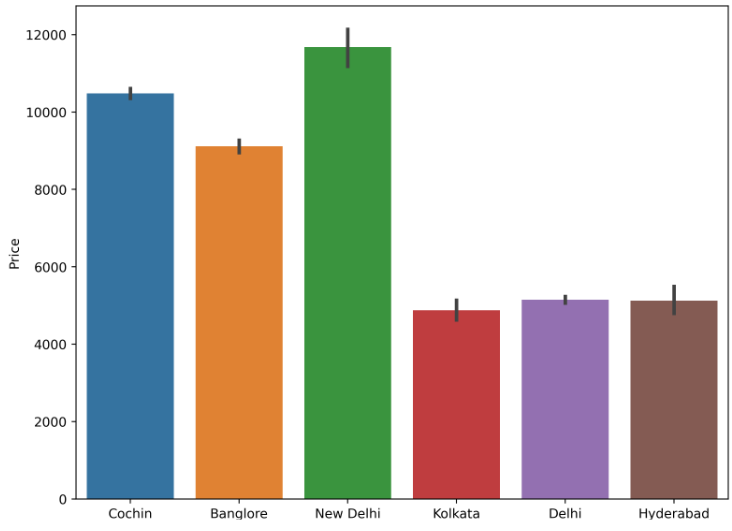

#### Output

```
[Displays a bar plot with Destinations on the x-axis and mean Price on the y-axis. Each bar shows the average price for each destination.]
```

#### Line-by-Line Explanation

- `sns.barplot(data=planes, x="Destination", y="Price")`
  - **What**: Plots the mean `Price` for each `Destination`.
  - **Why**: To see if some destinations are more expensive.
  - **Expected Output**: Bars of different heights; if New Delhi's bar is tallest, it suggests higher average prices.
- `plt.show()`
  - **What**: Displays the plot.

#### Significance

- Provides evidence to support or refute a hypothesis about destination pricing.

---

## 9. Next Steps: Designing an Experiment

- Once we've generated hypotheses:
  - **Design the experiment**:
    - Choose an appropriate sample.
    - Calculate the required sample size.
    - Decide on the statistical test to use.
- These steps help ensure valid, reproducible results.

---

## Summary

- **EDA** helps us discover potential relationships in data and generate hypotheses.
- **Visualizations** (like heatmaps, scatter plots, and bar plots) are key EDA tools.
- Avoid **data snooping**: Always separate hypothesis generation (EDA) from hypothesis testing.
- **Hypothesis testing** is the formal process to confirm or refute our ideas, requiring careful planning.
- **Next steps**: Practice generating and articulating hypotheses from your own EDA!

---

**Image credit**: [markuswinkler on Unsplash](https://unsplash.com/@markuswinkler)

### Exercise
Comparing salaries
Exploratory data analysis is a crucial step in generating hypotheses!

You've had an idea you'd like to explore—do data professionals get paid more in the USA than they do in Great Britain?

You'll need to subset the data by "Employee_Location" and produce a plot displaying the average salary between the two groups.

The salaries DataFrame has been imported as a pandas DataFrame.

pandas has been imported as pd, maplotlib.pyplot as plt and seaborn as sns.

Instructions

Filter salaries where "Employee_Location" is "US" or "GB", saving as usa_and_gb.
Use usa_and_gb to create a barplot visualizing "Salary_USD" against "Employee_Location".
```python
# Filter for employees in the US or GB
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD")
plt.show()
```
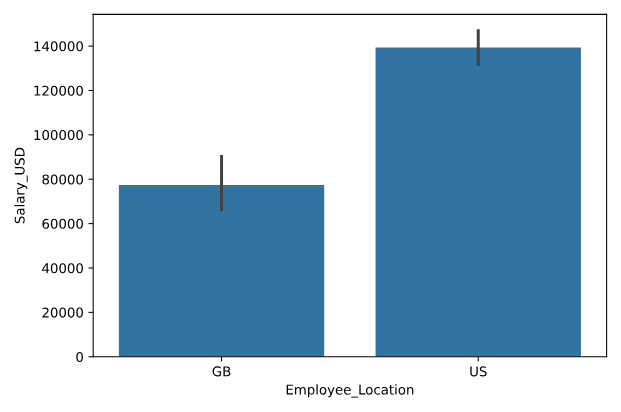

### Exercise
Choosing a hypothesis
You've seen how visualizations can be used to generate hypotheses, making them a crucial part of exploratory data analysis!

In this exercise, you'll generate a bar plot to inspect how salaries differ based on company size and employment status. For reference, there are four values:

Value	Meaning
CT	Contractor
FL	Freelance
PT	Part-time
FT	Full-time
pandas has been imported as pd, matplotlib.pyplot as plt, seaborn as sns, and the salaries dataset as a pandas DataFrame called salaries.

Instructions 1/2

Produce a barplot comparing "Salary_USD" by "Company_Size", factoring "Employment_Status".
```python
# Create a bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, x="Company_Size", y="Salary_USD", hue="Employment_Status")
plt.show()
```
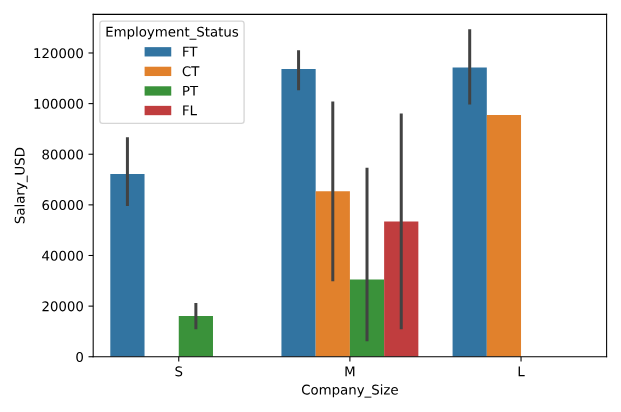

Question
What is a reasonable hypothesis to generate based on this plot?

Possible answersc


On average, small companies pay part-time employees less than large companies.

Freelancers earn more at medium-sized companies compared to small or large companies.

On average, large companies pay contractors more than medium-sized companies.

No hypotheses can be generated from this plot.


# Exploratory Data Analysis in Python: Course Summary

- This notebook summarizes key concepts, techniques, and code examples you learned, following the sequence of the course.

---

## 2. Inspection and Validation

**Purpose:**  
Before analyzing data, it's crucial to inspect it and ensure the data types are as expected.

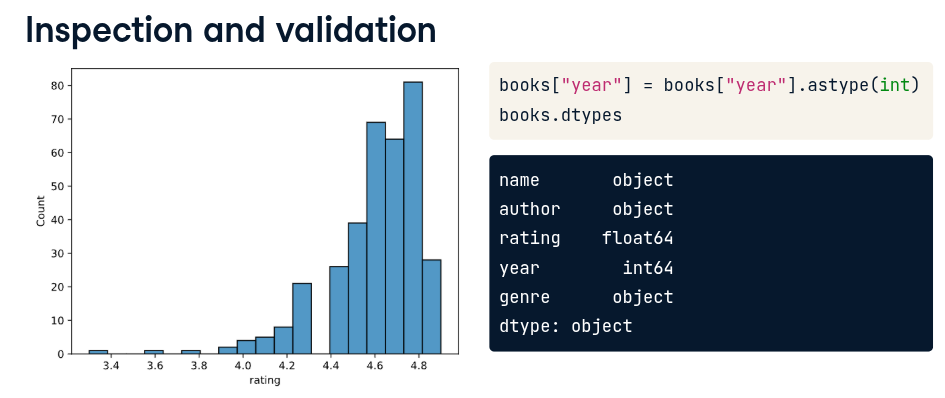

### Example: Validating and Converting Data Types

```python
books["year"] = books["year"].astype(int)
books.dtypes
```

#### Output

```
name       object
author     object
rating    float64
year        int64
genre      object
dtype: object
```

#### Line-by-Line Explanation

- `books["year"] = books["year"].astype(int)`
  - **What:** Converts the `year` column to integer type.
  - **Why:** Ensures consistency and allows for numerical operations on the year.
  - **Expected Output:** The `year` column now has `int64` dtype.
- `books.dtypes`
  - **What:** Displays the data types of all columns in the `books` DataFrame.
  - **Why:** To confirm all columns have appropriate types.

#### Significance

- Proper data types prevent errors and allow for correct analysis.
- It's an essential first step in any data analysis workflow.

---

## 3. Aggregation

**Purpose:**  
Summarize data by groups to reveal patterns.

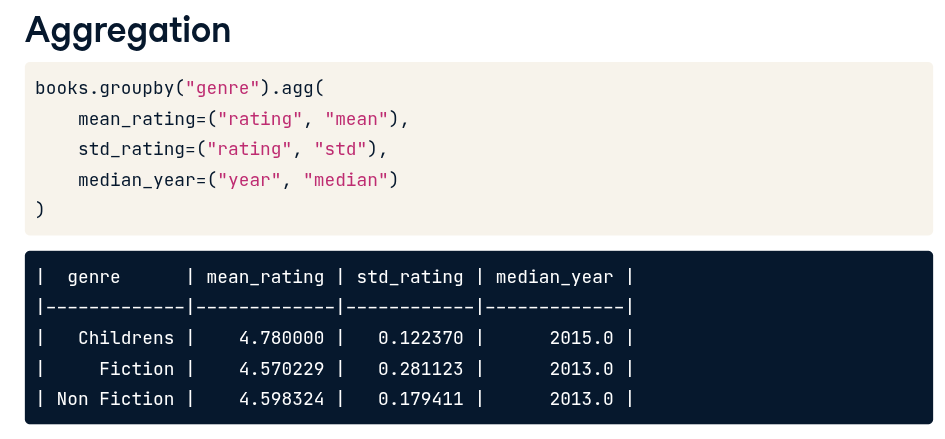

### Example: Aggregating Summary Statistics by Category

```python
books.groupby("genre").agg(
    mean_rating=("rating", "mean"),
    std_rating=("rating", "std"),
    median_year=("year", "median")
)
```

#### Output

| genre        | mean_rating | std_rating | median_year |
|--------------|-------------|------------|-------------|
| Childrens    | 4.780000    | 0.122370   | 2015.0      |
| Fiction      | 4.570229    | 0.281123   | 2013.0      |
| Non Fiction  | 4.598324    | 0.179411   | 2013.0      |

#### Line-by-Line Explanation

- `books.groupby("genre")`
  - **What:** Groups the `books` DataFrame by the `genre` column.
  - **Why:** To perform calculations for each genre separately.
- `.agg(mean_rating=("rating", "mean"), std_rating=("rating", "std"), median_year=("year", "median"))`
  - **What:** Calculates the mean and standard deviation of `rating` and the median of `year` for each genre.
  - **Why:** To get summary statistics that describe each genre.

#### Significance

- Aggregation helps compare categories and understand group-level patterns.

---

## 4. Address Missing Data

**Purpose:**  
Identify and handle missing data to avoid skewed results or errors.

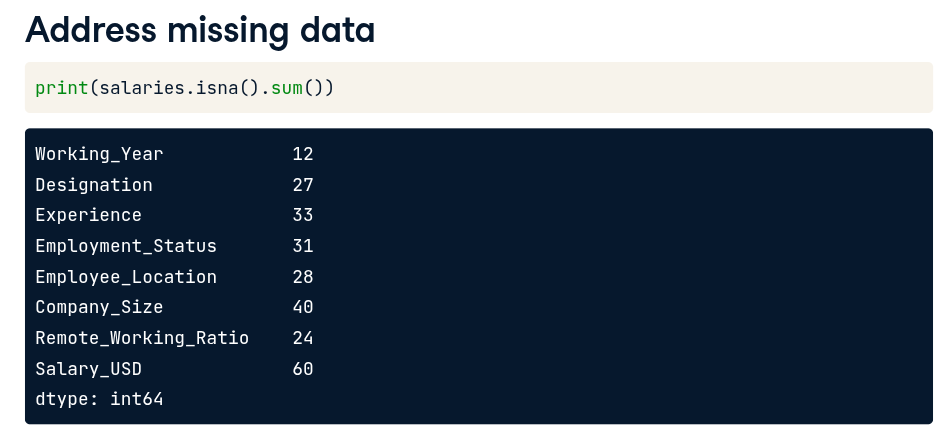

### Example: Checking for Missing Values

```python
print(salaries.isna().sum())
```

#### Output

```
Working_Year             12
Designation              27
Experience               33
Employment_Status        31
Employee_Location        28
Company_Size             40
Remote_Working_Ratio     24
Salary_USD               60
dtype: int64
```

#### Line-by-Line Explanation

- `salaries.isna()`
  - **What:** Returns a DataFrame of the same shape as `salaries`, with `True` where values are missing.
- `.sum()`
  - **What:** Sums over each column, giving the total number of missing values in each.
- `print(...)`
  - **What:** Prints the result.

#### Significance

- Knowing which columns have missing data guides how to address them.

---

### Strategies for Addressing Missing Data

- **Drop missing values:** Remove rows with missing entries.
- **Impute values:** Fill in missing data using the mean, median, or mode.
- **Impute by sub-group:** Use group-specific statistics for imputation.

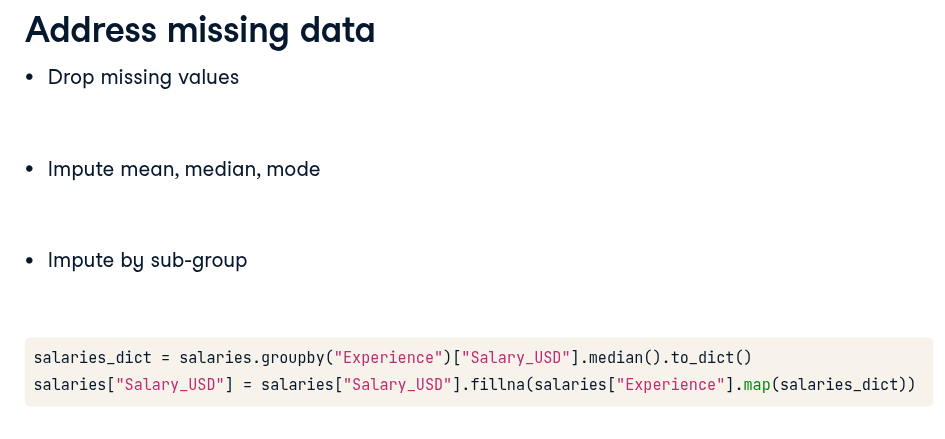

#### Example: Imputing Salary by Experience Group Median

```python
salaries_dict = salaries.groupby("Experience")["Salary_USD"].median().to_dict()
salaries["Salary_USD"] = salaries["Salary_USD"].fillna(salaries["Experience"].map(salaries_dict))
```

#### Line-by-Line Explanation

- `salaries.groupby("Experience")["Salary_USD"].median()`
  - **What:** Computes the median salary for each experience level.
- `.to_dict()`
  - **What:** Converts the result into a dictionary: `{experience: median_salary}`.
- `salaries["Experience"].map(salaries_dict)`
  - **What:** Maps each row's experience to the corresponding median salary.
- `salaries["Salary_USD"].fillna(...)`
  - **What:** Fills missing `Salary_USD` values with the mapped median.
- **Why:** This preserves the relationship between experience and salary when imputing missing values.

#### Significance

- Imputing by group can yield more accurate estimates than using a single global average.

---

## 5. Analyze Categorical Data

**Purpose:**  
Create meaningful categories from strings or other data, aiding further analysis.

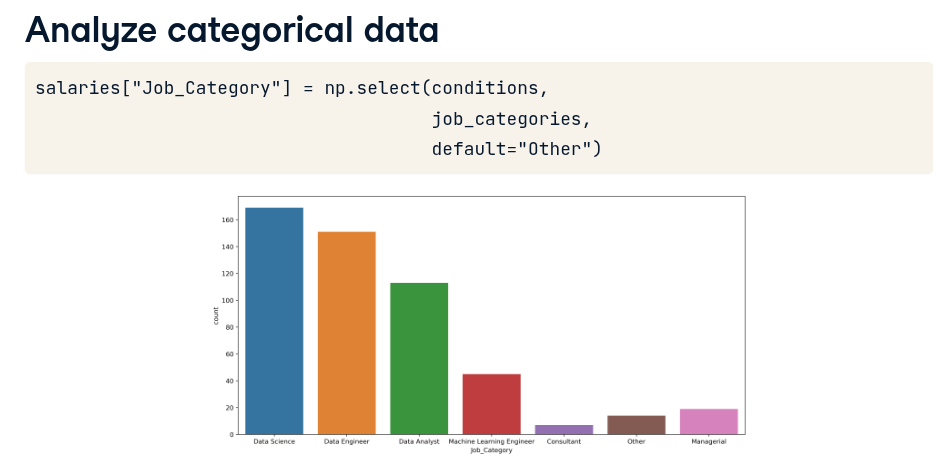

### Example: Creating a New Categorical Column

```python
salaries["Job_Category"] = np.select(conditions, job_categories, default="Other")
```

#### Line-by-Line Explanation

- `np.select(conditions, job_categories, default="Other")`
  - **What:** Assigns a category from `job_categories` based on matching `conditions`.
  - **Why:** To classify rows into job categories.
- `salaries["Job_Category"] = ...`
  - **What:** Adds the new `Job_Category` column to the DataFrame.

#### Significance

- Categorizing data enables group-wise analysis and modeling.

---

## 6. Apply Lambda Functions

**Purpose:**  
Compute custom or conditional statistics efficiently.

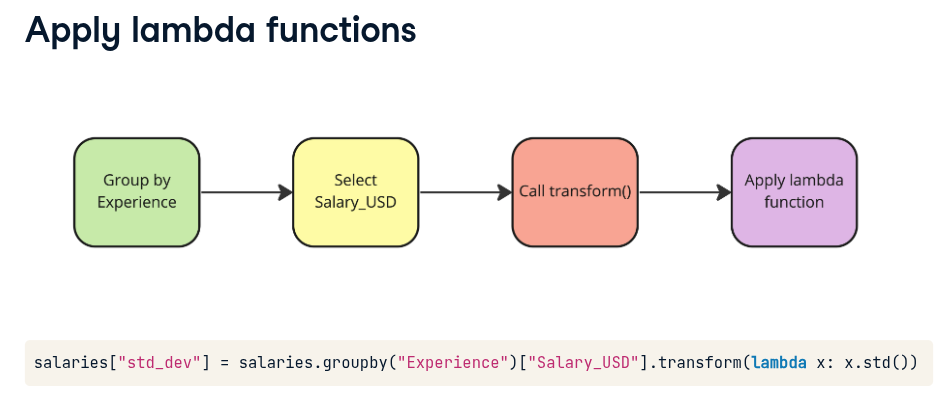

### Example: Calculating Standard Deviation by Group

```python
salaries["std_dev"] = salaries.groupby("Experience")["Salary_USD"].transform(lambda x: x.std())
```

#### Line-by-Line Explanation

- `salaries.groupby("Experience")["Salary_USD"]`
  - **What:** Groups `Salary_USD` by `Experience`.
- `.transform(lambda x: x.std())`
  - **What:** Applies the standard deviation calculation to each group, returning a Series aligned to the original index.
- `salaries["std_dev"] = ...`
  - **What:** Stores the result in a new column.

#### Significance

- Adds group-level variability information to each row, useful for further analysis.

---

## 7. Handle Outliers

**Purpose:**  
Identify and visualize extreme values that may affect analysis.

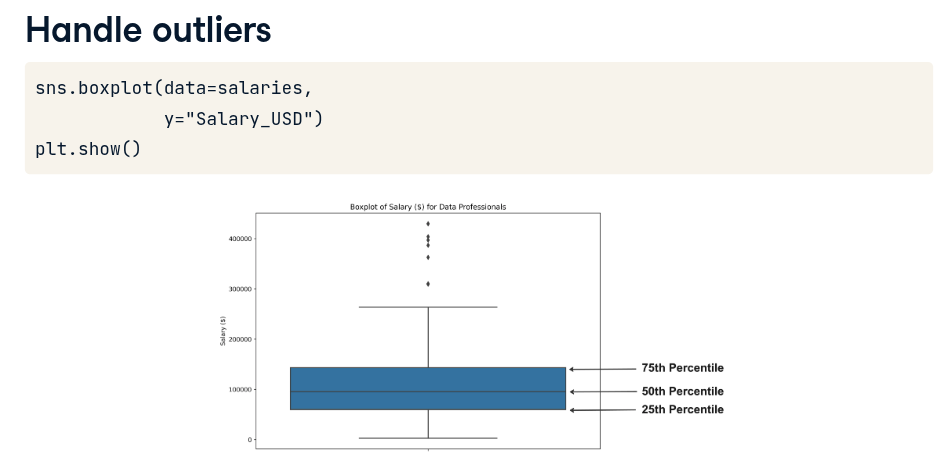

### Example: Visualizing Outliers with a Boxplot

```python
sns.boxplot(data=salaries, y="Salary_USD")
plt.show()
```

#### Output

```
[Boxplot appears: Shows median, interquartile range, and outliers for Salary_USD.]
```

#### Line-by-Line Explanation

- `sns.boxplot(data=salaries, y="Salary_USD")`
  - **What:** Creates a vertical boxplot for the `Salary_USD` column.
  - **Why:** To visualize the distribution and spot outliers.
- `plt.show()`
  - **What:** Displays the boxplot.

#### Significance

- Boxplots quickly show data spread and highlight potential anomalies.

---

## 8. Patterns Over Time

**Purpose:**  
Analyze trends and changes across time.

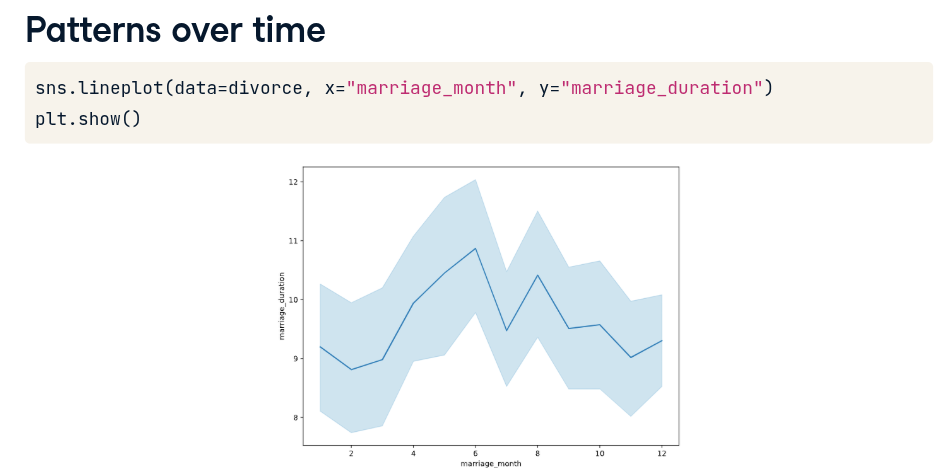

### Example: Line Plot of Patterns Over Time

```python
sns.lineplot(data=divorce, x="marriage_month", y="marriage_duration")
plt.show()
```

#### Output

```
[Line plot showing how average marriage duration varies by marriage month.]
```

#### Line-by-Line Explanation

- `sns.lineplot(data=divorce, x="marriage_month", y="marriage_duration")`
  - **What:** Creates a line plot of marriage duration over the months.
  - **Why:** To detect seasonal or temporal patterns.
- `plt.show()`
  - **What:** Shows the plot.

#### Significance

- Understanding time-based patterns can inform predictions and business decisions.

---

## 9. Correlation

**Purpose:**  
Assess the strength and direction of relationships between numerical variables.

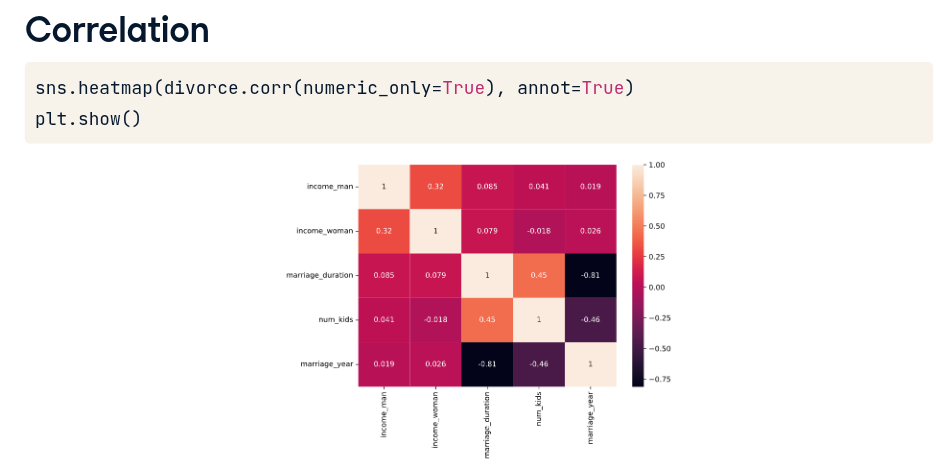

### Example: Correlation Heatmap

```python
sns.heatmap(divorce.corr(numeric_only=True), annot=True)
plt.show()
```

#### Output

```
[Heatmap showing correlation coefficients between numeric columns, with values displayed in each cell.]
```

#### Line-by-Line Explanation

- `divorce.corr(numeric_only=True)`
  - **What:** Calculates the correlation matrix for all numeric columns.
- `sns.heatmap(..., annot=True)`
  - **What:** Plots the matrix as a heatmap, annotating values.
- `plt.show()`
  - **What:** Displays the heatmap.

#### Significance

- Helps visually identify which variables are strongly related.

---

## 10. Distributions

**Purpose:**  
Understand the spread and shape of data for continuous variables.

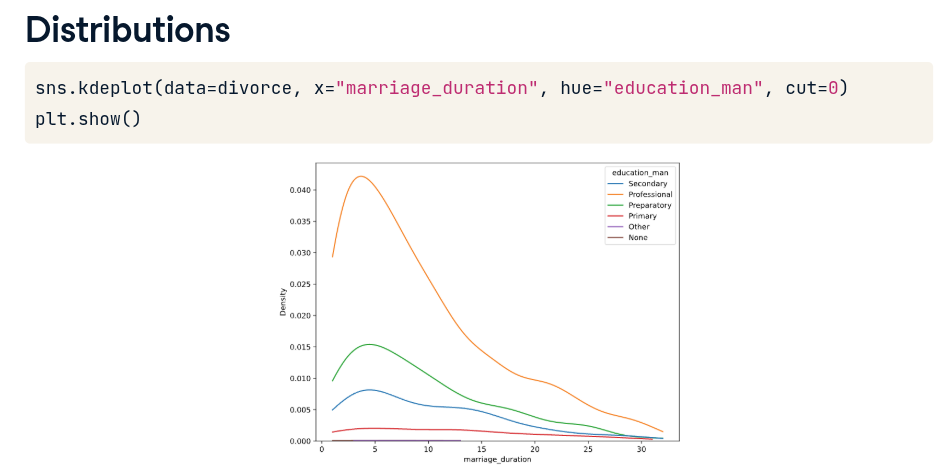

### Example: Kernel Density Plot by Category

```python
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0)
plt.show()
```

#### Output

```
[KDE plot showing the distribution of marriage duration for each education level of men.]
```

#### Line-by-Line Explanation

- `sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0)`
  - **What:** Plots the probability density of marriage duration, colored by man's education.
  - **Why:** To compare how distributions differ by education.
- `plt.show()`
  - **What:** Shows the plot.

#### Significance

- Reveals differences in distributions across categories.

---

## 11. Cross-tabulation

**Purpose:**  
Summarize the relationship between two categorical variables, optionally including a numerical value.

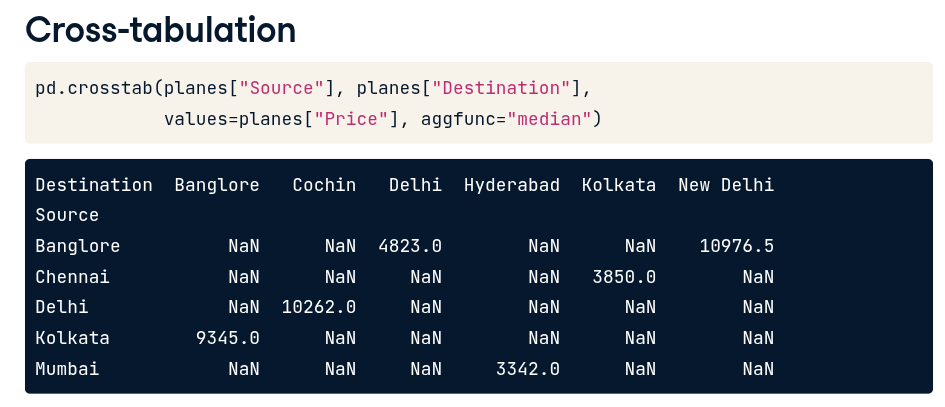

### Example: Median Price by Flight Source and Destination

```python
pd.crosstab(
    planes["Source"], planes["Destination"],
    values=planes["Price"], aggfunc="median"
)
```

#### Output

| Destination | Banglore | Cochin | Delhi | Hyderabad | Kolkata | New Delhi |
|-------------|----------|--------|-------|-----------|---------|-----------|
| Banglore    | NaN      | NaN    | 4823.0| NaN       | NaN     | 10976.5   |
| Chennai     | NaN      | NaN    | NaN   | NaN       | 3850.0  | NaN       |
| Delhi       | NaN      |10262.0 | NaN   | NaN       | NaN     | NaN       |
| Kolkata     | 9345.0   | NaN    | NaN   | NaN       | NaN     | NaN       |
| Mumbai      | NaN      | NaN    | NaN   | 3342.0    | NaN     | NaN       |

#### Line-by-Line Explanation

- `pd.crosstab(planes["Source"], planes["Destination"], values=planes["Price"], aggfunc="median")`
  - **What:** Builds a table of median prices for each (Source, Destination) pair.
  - **Why:** To compare flight prices across different routes.

#### Significance

- Cross-tabulation is powerful for multi-category comparisons.

---

## 12. Feature Engineering with `pd.cut()`

**Purpose:**  
Bin continuous variables into discrete categories.

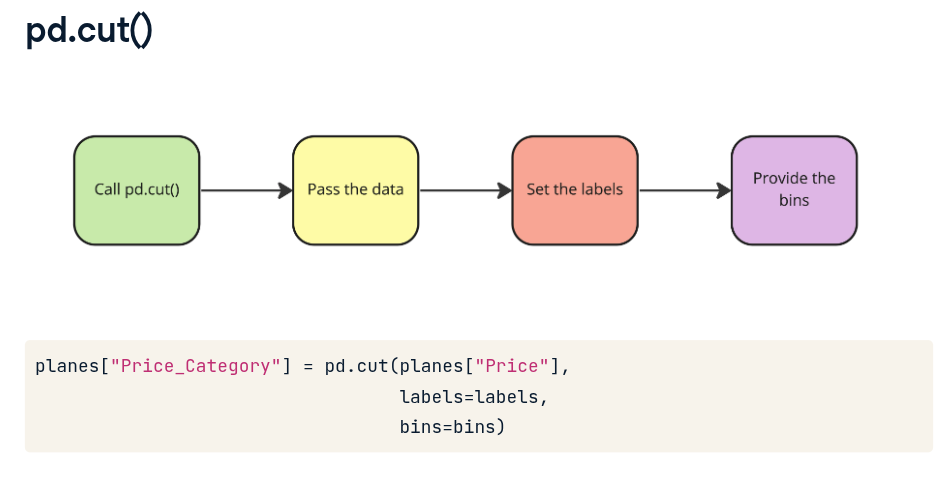

### Example: Binning Price Into Categories

```python
planes["Price_Category"] = pd.cut(planes["Price"], labels=labels, bins=bins)
```

#### Line-by-Line Explanation

- `pd.cut(planes["Price"], labels=labels, bins=bins)`
  - **What:** Splits `Price` into intervals (`bins`), assigns each value a label.
  - **Why:** To create a categorical version of a continuous variable.
- `planes["Price_Category"] = ...`
  - **What:** Adds the new binned category to the DataFrame.

#### Significance

- Binning helps with categorical analysis and visualizations.

---

## 13. Data Snooping

**Purpose:**  
Highlight the risks of forming hypotheses after seeing the data (p-hacking).

- **Best practice:** Formulate hypotheses before looking at detailed results to avoid bias.

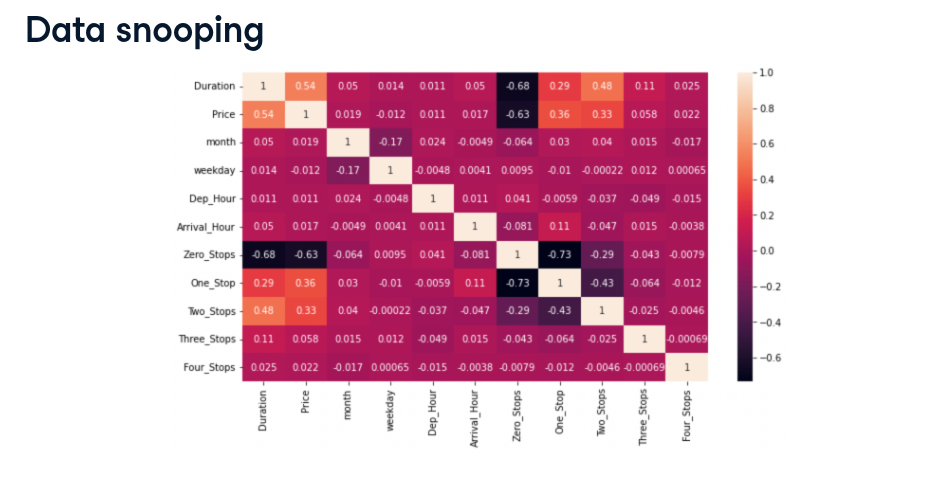

---

## 14. Generating Hypotheses

**Purpose:**  
Use EDA to spot patterns and generate testable hypotheses.

### Example: Bar Plot to Explore Group Differences

```python
sns.barplot(data=planes, x="Airline", y="Duration")
plt.show()
```

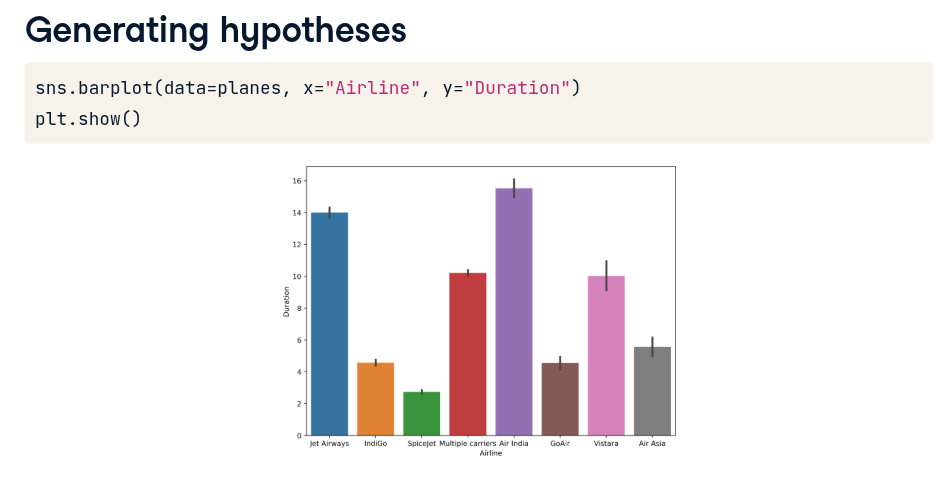

#### Output

```
[Bar plot showing mean flight duration for each airline.]
```

#### Line-by-Line Explanation

- `sns.barplot(data=planes, x="Airline", y="Duration")`
  - **What:** Plots mean duration by airline.
  - **Why:** To check if some airlines have longer flights.
- `plt.show()`
  - **What:** Displays the plot.

#### Significance

- Visual EDA guides us in forming meaningful hypotheses for further testing.

---

## 15. Next Steps

- **Sampling in Python:** Learn about sampling techniques for robust analysis.
- **Hypothesis Testing:** Dive into formal hypothesis testing methods in Python.
- **Supervised Learning:** Explore machine learning with scikit-learn.

---


In [ ]:
# EDA CHAP ENDS... SO -> Python DATA FUNDAMENTALS